In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
X = df.drop('label', axis=1)

In [5]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
y = df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
df = df.dropna()

In [10]:
df.shape

(18285, 5)

In [11]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
news = df.copy()

In [13]:
news.reset_index(inplace = True)

In [14]:
news.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [18]:
news = news.iloc[:8000,:]

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

stemmer = PorterStemmer()



In [20]:
corpus = []
for i in range(0, len(news)):
    review = re.sub('[^a-zA-Z]', ' ', news['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [21]:
corpus[6]

'pari franc chose idealist tradit candid sunday primari repres socialist parti presidenti elect spring candid beno hamon ran slogan would make franc heart beat best manuel vall former prime minist whose campaign promot polici strong background mr hamon appear wide margin incomplet return show estim percent vote mr vall percent tonight left hold head high look futur mr hamon said address support countri need left modern innov left said mr hamon victori clearest sign yet voter left want break polici presid fran oi holland decemb announc would seek howev mr hamon strong show unlik chang widespread assess candid littl chanc make second round vote gener elect first round gener elect set april runoff may socialist parti deepli divid one measur lack popular enthusiasm rel low number peopl vote two million peopl vote second round primari sunday contrast million second round last presidenti primari left howev much convent wisdom elect go thrown question past week lead candid fran oi fillon repr

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 5000, ngram_range = (1,3))
X = tfidf.fit_transform(corpus).toarray()

In [23]:
X.shape

(8000, 5000)

In [24]:
y = news['label']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

In [28]:
tfidf.get_feature_names()[:10]

C:\Users\barat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'abandon',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad']

In [30]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [32]:
count_df = pd.DataFrame(x_train, columns=tfidf.get_feature_names())

In [33]:
count_df.head()

,aaron,abandon,abc,abc news,abe,abedin,abil,abl,abort,abroad,...,young man,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.019717,0.0,0.0,...,0.0,0.0,0.029449,0.030474,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.018512,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.018976,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.092157,0.047682,0.0,0.000000,0.0,0.0,0.0,0.0


In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.897
Confusion matrix, without normalization


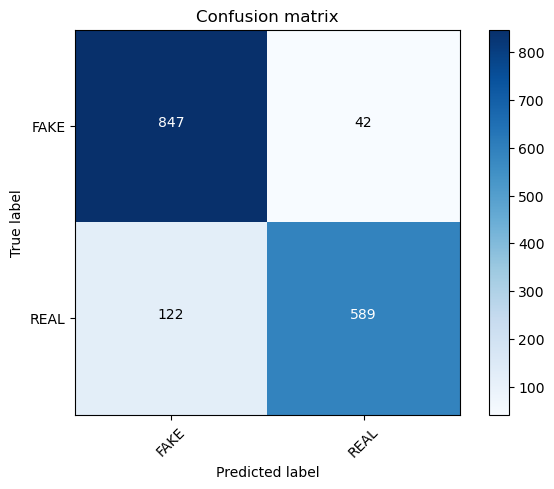

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools

classifier=MultinomialNB()

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [36]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8975

In [37]:
classifier=MultinomialNB(alpha=0.1)

In [40]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\barat\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha: 0.0, Score : 0.9025
Alpha: 0.1, Score : 0.900625
Alpha: 0.2, Score : 0.8975
Alpha: 0.30000000000000004, Score : 0.8975
Alpha: 0.4, Score : 0.89625
Alpha: 0.5, Score : 0.89625
Alpha: 0.6000000000000001, Score : 0.89625
Alpha: 0.7000000000000001, Score : 0.896875
Alpha: 0.8, Score : 0.896875
Alpha: 0.9, Score : 0.8975


In [44]:
classifier.coef_[0]

C:\Users\barat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-9.65979097, -8.82296773, -8.75794133, ..., -9.15121614,
       -8.25350163, -8.20919719])

In [45]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.44652510266007, 'clinton'),
 (-5.567042855438324, 'trump'),
 (-5.717538695736962, 'hillari'),
 (-5.979346259447694, 'us'),
 (-6.009752960303674, 'elect'),
 (-6.212934717367198, 'peopl'),
 (-6.2296172311108675, 'email'),
 (-6.237037083657195, 'state'),
 (-6.307370501763831, 'one'),
 (-6.3150494274759525, 'vote'),
 (-6.339547564981536, 'fbi'),
 (-6.343887189184331, 'hillari clinton'),
 (-6.381770488868615, 'would'),
 (-6.420393730297954, 'like'),
 (-6.440116702805438, 'american'),
 (-6.454784336632134, 'war'),
 (-6.500814887825382, 'time'),
 (-6.505398322589187, 'world'),
 (-6.519242485924222, 'use'),
 (-6.5269278123619685, 'octob')]

In [46]:
sorted(zip(classifier.coef_[0], feature_names))[:100]

[(-10.411285028270981, 'advis mr'),
 (-10.411285028270981, 'automak'),
 (-10.411285028270981, 'brief post'),
 (-10.411285028270981, 'critic mr'),
 (-10.411285028270981, 'espn'),
 (-10.411285028270981, 'follow pam'),
 (-10.411285028270981, 'follow pam key'),
 (-10.411285028270981, 'freedom caucu'),
 (-10.411285028270981, 'gold medal'),
 (-10.411285028270981, 'gorsuch'),
 (-10.411285028270981, 'hawkin'),
 (-10.411285028270981, 'judg gorsuch'),
 (-10.411285028270981, 'key twitter'),
 (-10.411285028270981, 'key twitter pamkeynen'),
 (-10.411285028270981, 'month mr'),
 (-10.411285028270981, 'morn brief'),
 (-10.411285028270981, 'mr ail'),
 (-10.411285028270981, 'mr bannon'),
 (-10.411285028270981, 'mr christi'),
 (-10.411285028270981, 'mr dutert'),
 (-10.411285028270981, 'mr flynn'),
 (-10.411285028270981, 'mr kushner'),
 (-10.411285028270981, 'mr roof'),
 (-10.411285028270981, 'mr sander'),
 (-10.411285028270981, 'mr scott'),
 (-10.411285028270981, 'mr session'),
 (-10.411285028270981, 'mr